# Lecture 5.6: Ensemble Moment Approximation

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

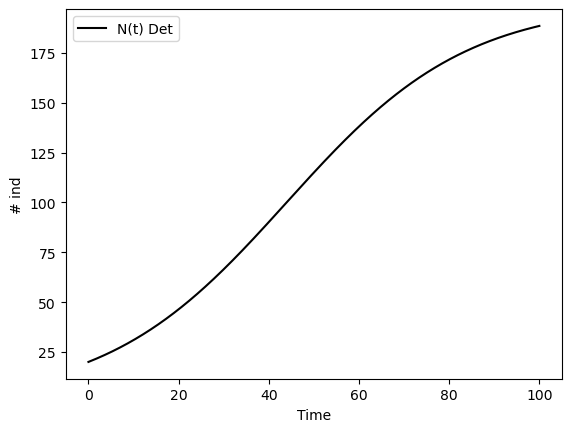

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs
def modelDet(N, t, b, d, gamma):
    dNdt = b * N - d * (1 + gamma * N) * N
    return dNdt

# Set the parameters
b = 0.1
d = 0.05
gamma = 0.005

# Set the initial condition
N0 = 20.0

# Set the time points for integration
t = np.linspace(0, 100, 1000)

# Numerically solve the ODE using odeint
solutionDet = odeint(modelDet, N0, t, args=(b, d, gamma))

# Plot the results
plt.plot(t, solutionDet, label='N(t) Det',color='black')
plt.xlabel('Time')
plt.ylabel('# ind')
plt.legend()
plt.show()


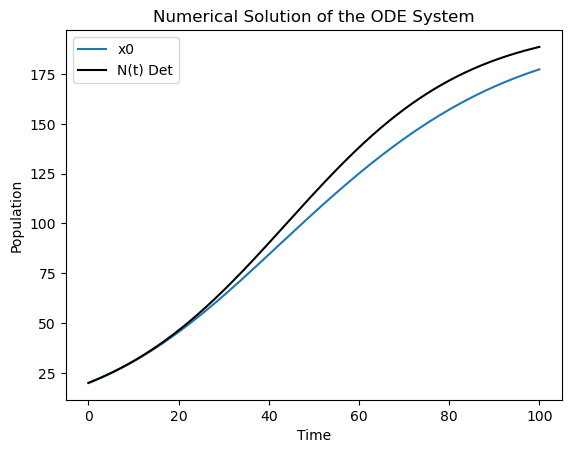

In [35]:
# Define the system of ODEs
def model(x, t, b, d, gamma):
    dx0dt = (b - d) * x[0] - d * gamma * x[1]
    dx1dt = 2 * (b + (gamma - 1) * d) * x[1] + 2 * (b + d) * x[0] - 2 * gamma * d * (3 * x[0] * x[1] - 2 * x[0]**3)
    return [dx0dt, dx1dt]

# Set the parameters
b = 0.1
d = 0.05
gamma = 0.005

# Set the initial conditions
x0_initial = 20.0
x1_initial = x0_initial**2
initial_conditions = [x0_initial, x1_initial]

# Set the time points for integration
t = np.linspace(0, 100, 1000)

# Numerically solve the ODEs using odeint
solution = odeint(model, initial_conditions, t, args=(b, d, gamma))

# Extract the solutions for x0 and x1
x0_solution, x1_solution = solution[:, 0], solution[:, 1]
var_solution=x1_solution-x0_solution**2

# Plot the results
plt.plot(t, x0_solution, label='x0')
plt.plot(t, solutionDet, label='N(t) Det',color='black')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Deterministic Versus Mean Dynamics')
plt.show()


The solution should be valid as long $Var(N)$ and $\left<N\right>$ are of the same order.  To understand the bounds of the 'order' we plot $\left<N\right>$ and$\left<N\right>^2$ 

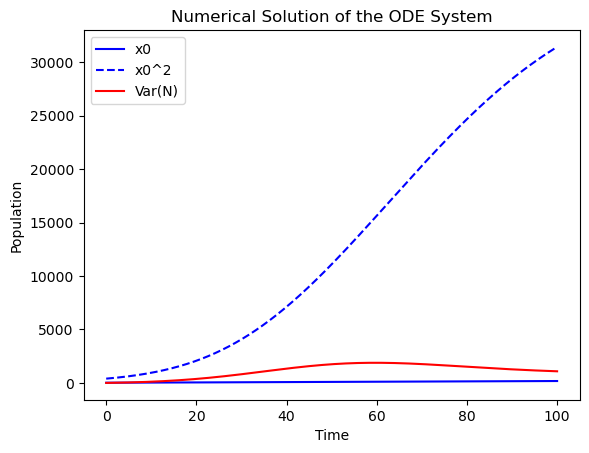

In [43]:
# Plot the results
plt.plot(t, x0_solution, label='x0',color='blue')
plt.plot(t, x0_solution**2, label='x0^2',color='blue', linestyle='--')
plt.plot(t, var_solution, label='Var(N)',color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Numerical Solution of the ODE System')
plt.show()

Another way of thinking about this is that the standard deviation of N and $\left<N\right>$ have to be roughly the same size. This makes sense otherwise the noise would involve lots of negative values of population size.

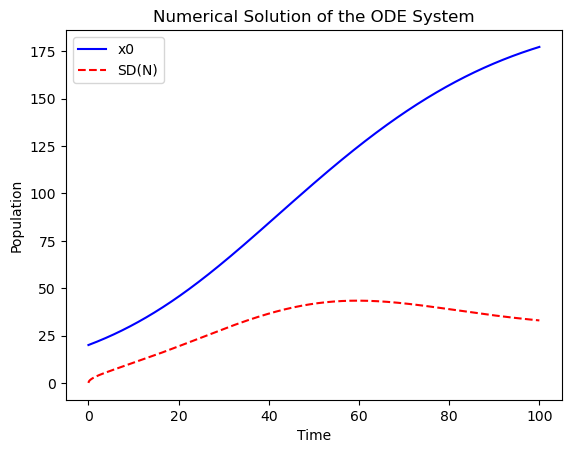

In [45]:
# Plot the results
plt.plot(t, x0_solution, label='x0',color='blue')
plt.plot(t, np.sqrt(var_solution), label='SD(N)',color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Numerical Solution of the ODE System')
plt.show()

Okay so our approximation should be roughly okay over this period.  So let's plot the plus or minus 1 SD.

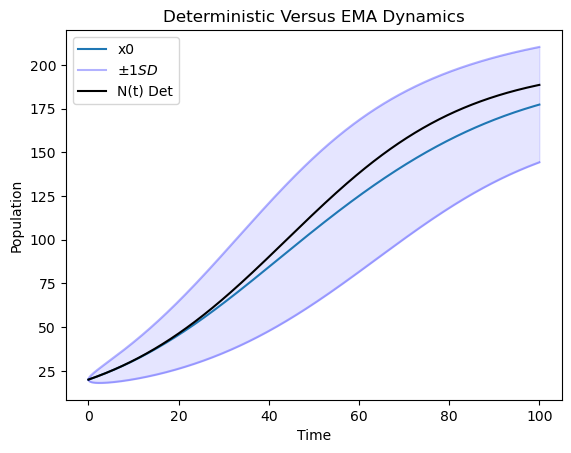

In [50]:
# Plot the results
plt.plot(t, x0_solution, label='x0')
plt.plot(t, x0_solution+np.sqrt(var_solution), color='blue',alpha=0.3, label='$\pm 1SD$')
plt.plot(t, x0_solution-np.sqrt(var_solution), color='blue',alpha=0.3)
plt.fill_between(t, x0_solution+np.sqrt(var_solution), x0_solution-np.sqrt(var_solution), color='blue', alpha=0.1)
plt.plot(t, solutionDet, label='N(t) Det',color='black')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Deterministic Versus EMA Dynamics')
plt.show()